In [1]:
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random

In [2]:
train_data = pd.read_csv('Trainingset_12.5Percent.csv')
test_data = pd.read_csv('Testingset_12.5Percent_training.csv')



In [3]:
print('Dimensions of the Training set:',train_data.shape)
print('Dimensions of the Testing set:',test_data.shape)



Dimensions of the Training set: (104601, 83)
Dimensions of the Testing set: (26151, 83)


In [4]:
train_data.head(5)

,Unnamed: 0,Dst Port,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_0,Protocol_6,Protocol_17
0,26400,53,02/03/2018 11:53:38,353,1,1,47,63.0,47,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
1,89947,53,02/03/2018 01:45:11,321,1,1,30,46.0,30,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
2,28770,80,02/03/2018 02:10:37,55285773,2,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
3,60429,443,02/03/2018 03:16:44,53919038,5,1,123,46.0,46,0,...,75389.0,75389.0,53800000.0,0.0,53800000.0,53800000.0,0,0,1,0
4,35465,80,02/03/2018 12:39:12,64235,1,1,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0


In [5]:
train_data.pop("Unnamed: 0")
test_data.pop("Unnamed: 0")

0             6
1            10
2            11
3            16
4            19
          ...  
26146    130732
26147    130733
26148    130738
26149    130741
26150    130748
Name: Unnamed: 0, Length: 26151, dtype: int64

In [6]:
train_data.pop("Timestamp")
test_data.pop("Timestamp")

0        02/03/2018 10:00:57
1        02/03/2018 11:20:27
2        02/03/2018 10:08:07
3        02/03/2018 05:29:32
4        02/03/2018 10:13:02
                ...         
26146    02/03/2018 01:08:12
26147    02/03/2018 11:06:06
26148    02/03/2018 10:14:26
26149    02/03/2018 03:01:54
26150    02/03/2018 12:55:22
Name: Timestamp, Length: 26151, dtype: object

In [7]:
train_data = train_data[np.isfinite(train_data).all(1)]
test_data = test_data[np.isfinite(test_data).all(1)]

In [8]:
print('Label distribution Training set:')
print(train_data['Label'].value_counts())
print()
print('Label distribution Test set:')
print(test_data['Label'].value_counts())

Label distribution Training set:
0    75828
1    28619
Name: Label, dtype: int64

Label distribution Test set:
0    18953
1     7155
Name: Label, dtype: int64


In [9]:
print('Dimensions of the Training set:',train_data.shape)
print('Dimensions of the Testing set:',test_data.shape)

Dimensions of the Training set: (104447, 81)
Dimensions of the Testing set: (26108, 81)


In [10]:
to_drop_Benign = [0,0]
to_drop_Infilteration = [0,1]

Benign_df=train_data[train_data['Label'].isin(to_drop_Benign)];
Infilteration_df=train_data[train_data['Label'].isin(to_drop_Infilteration)];

#test
Benign_df_test=test_data[test_data['Label'].isin(to_drop_Benign)];
Infilteration_df_test=test_data[test_data['Label'].isin(to_drop_Infilteration)];

print('Train:')
print('Dimensions of Benign:' ,Benign_df.shape)
print('Dimensions of Infilteration:' ,Infilteration_df.shape)
print()
print('Test:')
print('Dimensions of Begin:' ,Benign_df_test.shape)
print('Dimensions of Infilteration:' ,Infilteration_df_test.shape)

Train:
Dimensions of Benign: (75828, 81)
Dimensions of Infilteration: (104447, 81)

Test:
Dimensions of Begin: (18953, 81)
Dimensions of Infilteration: (26108, 81)


In [11]:
#Split dataframes into X & Y
# X Properties, Y result variables

X_Benign = Benign_df.drop('Label',1)
Y_Benign = Benign_df.Label

X_Infilteration = Infilteration_df.drop('Label',1)
Y_Infilteration = Infilteration_df.Label


#test
X_Benign_test = Benign_df_test.drop('Label',1)
Y_Benign_test = Benign_df_test.Label

X_Infilteration_test = Infilteration_df_test.drop('Label',1)
Y_Infilteration_test = Infilteration_df_test.Label


In [12]:
from sklearn import preprocessing

scaler2 = preprocessing.StandardScaler().fit(X_Infilteration)
X_Infilteration=scaler2.transform(X_Infilteration)


# test data

scaler4 = preprocessing.StandardScaler().fit(X_Infilteration_test)
X_Infilteration_test=scaler4.transform(X_Infilteration_test)

# SVM

In [13]:
import time

In [14]:
from sklearn.svm import SVC

#clf_SVM_Benign=SVC(kernel='linear', C=1.0, random_state=0)
clf_SVM_Infilteration=SVC(kernel='linear', C=1.0, random_state=0)
train0 = time.time()


#clf_SVM_Benign.fit(X_Benign, Y_Benign.astype(int))
clf_SVM_Infilteration.fit(X_Infilteration, Y_Infilteration.astype(int))
train1 = time.time() - train0


In [15]:
test0 = time.time()
Y_Infilteration_pred=clf_SVM_Infilteration.predict(X_Infilteration_test)
test1 = time.time() - test0

# Create confusion matrix
pd.crosstab(Y_Infilteration_test, Y_Infilteration_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,18629,324
1,1,7154


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("train_time:%.3fs\n" %train1)
print("test_time:%.3fs\n" %test1)

Accuracy: 0.98744 (+/- 0.00370)
Precision: 0.95682 (+/- 0.01208)
Recall: 0.99930 (+/- 0.00225)
F-measure: 0.97759 (+/- 0.00646)
train_time:97.820s

test_time:7.609s



In [17]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_Infilteration_test, Y_Infilteration_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f", roc_auc)
print("Threshold: %f", thresholds)
print("FPR: %f", fpr)
print("TPR: %f", tpr)

Area under the ROC curve: %f 0.9913826592929518
Threshold: %f [2 1 0]
FPR: %f [0.         0.01709492 1.        ]
TPR: %f [0.         0.99986024 1.        ]


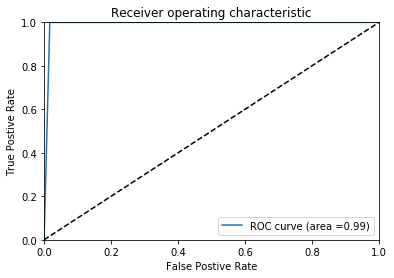

In [18]:
import pylab as pl

pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area =%0.2f)'% roc_auc)
pl.plot([0,1],[0,1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Postive Rate')
pl.ylabel('True Postive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.show()

In [19]:
from sklearn.svm import SVC

clf_SVM_Infilteration=SVC(kernel='rbf', C=1.0, random_state=0)
train0 = time.time()

clf_SVM_Infilteration.fit(X_Infilteration, Y_Infilteration.astype(int))
train1 = time.time() - train0

In [20]:
test0 = time.time()
Y_Infilteration_pred=clf_SVM_Infilteration.predict(X_Infilteration_test)
test1 = time.time() - test0

# Create confusion matrix
pd.crosstab(Y_Infilteration_test, Y_Infilteration_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,18895,58
1,8,7147


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("train_time:%.3fs\n" %train1)
print("test_time:%.3fs\n" %test1)

Accuracy: 0.99383 (+/- 0.00420)
Precision: 0.97975 (+/- 0.01403)
Recall: 0.99818 (+/- 0.00307)
F-measure: 0.98887 (+/- 0.00752)
train_time:63.844s

test_time:13.430s



In [22]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_Infilteration_test, Y_Infilteration_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f", roc_auc)
print("Threshold: %f", thresholds)
print("FPR: %f", fpr)
print("TPR: %f", tpr)

Area under the ROC curve: %f 0.997910849608744
Threshold: %f [2 1 0]
FPR: %f [0.        0.0030602 1.       ]
TPR: %f [0.        0.9988819 1.       ]


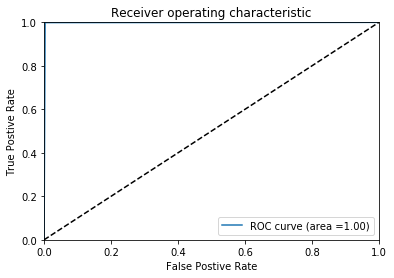

In [23]:
import pylab as pl

pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area =%0.2f)'% roc_auc)
pl.plot([0,1],[0,1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Postive Rate')
pl.ylabel('True Postive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.show()

In [24]:
from sklearn.svm import SVC

clf_SVM_Infilteration=SVC(kernel='poly', C=1.0, random_state=0)
train0 = time.time()

clf_SVM_Infilteration.fit(X_Infilteration, Y_Infilteration.astype(int))
train1 = time.time() - train0

In [25]:
test0 = time.time()
Y_Infilteration_pred=clf_SVM_Infilteration.predict(X_Infilteration_test)
test1 = time.time() - test0

# Create confusion matrix
pd.crosstab(Y_Infilteration_test, Y_Infilteration_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,18402,551
1,6,7149


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("train_time:%.3fs\n" %train1)
print("test_time:%.3fs\n" %test1)

Accuracy: 0.95771 (+/- 0.00700)
Precision: 0.86643 (+/- 0.01914)
Recall: 1.00000 (+/- 0.00000)
F-measure: 0.92841 (+/- 0.01102)
train_time:117.835s

test_time:25.535s



In [27]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_Infilteration_test, Y_Infilteration_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f", roc_auc)
print("Threshold: %f", thresholds)
print("FPR: %f", fpr)
print("TPR: %f", tpr)

Area under the ROC curve: %f 0.9850447554200332
Threshold: %f [2 1 0]
FPR: %f [0.         0.02907191 1.        ]
TPR: %f [0.         0.99916143 1.        ]


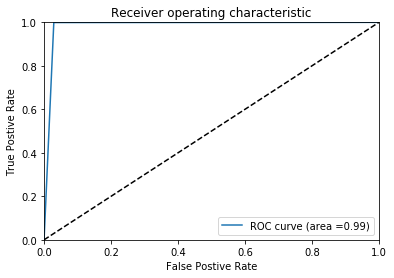

In [28]:
import pylab as pl

pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area =%0.2f)'% roc_auc)
pl.plot([0,1],[0,1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Postive Rate')
pl.ylabel('True Postive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.show()

In [29]:
from sklearn.svm import SVC

clf_SVM_Infilteration=SVC(kernel='sigmoid', C=1.0, random_state=0)
train0 = time.time()

clf_SVM_Infilteration.fit(X_Infilteration, Y_Infilteration.astype(int))
train1 = time.time() - train0

In [30]:
test0 = time.time()
Y_Infilteration_pred=clf_SVM_Infilteration.predict(X_Infilteration_test)
test1 = time.time() - test0

# Create confusion matrix
pd.crosstab(Y_Infilteration_test, Y_Infilteration_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,18854,99
1,3594,3561


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("train_time:%.3fs\n" %train1)
print("test_time:%.3fs\n" %test1)

Accuracy: 0.95488 (+/- 0.00843)
Precision: 0.86510 (+/- 0.02260)
Recall: 0.98994 (+/- 0.01457)
F-measure: 0.92326 (+/- 0.01356)
train_time:562.877s

test_time:31.911s



In [32]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_Infilteration_test, Y_Infilteration_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f", roc_auc)
print("Threshold: %f", thresholds)
print("FPR: %f", fpr)
print("TPR: %f", tpr)

Area under the ROC curve: %f 0.746235236430048
Threshold: %f [2 1 0]
FPR: %f [0.         0.00522345 1.        ]
TPR: %f [0.         0.49769392 1.        ]


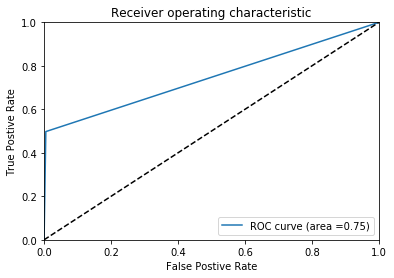

In [33]:
import pylab as pl

pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area =%0.2f)'% roc_auc)
pl.plot([0,1],[0,1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Postive Rate')
pl.ylabel('True Postive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.show()